In [3]:
import tensorflow as tf
import os
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("/content/drive/MyDrive/Final Fashion Dataset.csv")
df.head()

,user_id,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,filename,link,ratings,review,Month,Price (USD)
0,93810,8493,Women,Apparel,Bottomwear,Skirts,Black,Fall,2011.0,Casual,Forever New Women Black Skirts,8493.jpg,http://assets.myntassets.com/v1/images/style/p...,5,Amazing quality! Definitely recommend. Would r...,November,46
1,24592,30757,Men,Apparel,Topwear,Kurtas,Grey,Summer,2012.0,Ethnic,Fabindia Men Grey Mangalgiri Kurta,30757.jpg,http://assets.myntassets.com/v1/images/style/p...,4,"Perfect for any occasion, great buy..",September,29
2,13278,14881,Women,Accessories,Bags,Handbags,Black,Summer,2011.0,Casual,United Colors of Benetton Women Solid Black Ha...,14881.jpg,http://assets.myntassets.com/v1/images/style/p...,3,"It's okay, nothing special.!",October,39
3,46048,48449,Men,Apparel,Topwear,Tshirts,Blue,Summer,2012.0,Casual,French Connection Men Blue T-shirt,48449.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"Comfortable and stylish, worth the price. and ...",August,39
4,42098,4697,Unisex,Accessories,Watches,Watches,Black,Winter,2016.0,Sports,ADIDAS Unisex Digital Duramo Black Watch,4697.jpg,http://assets.myntassets.com/v1/images/style/p...,4,"Perfect for any occasion, great buy.!",March,33


In [6]:
import zipfile

# Path to the zip file
zip_path = "/content/drive/MyDrive/Copy of images.zip"

# Extract to a directory
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/your_image_directory")


In [7]:
df.shape

(36484, 17)

In [8]:
IMAGE_SIZE = (60, 80)
BATCH_SIZE = 32

In [9]:
image_folder = '/content/your_image_directory/images'

In [10]:
# Create a list of full image paths from the CSV
image_paths = [os.path.join(image_folder, image_id) for image_id in df['filename']]

In [11]:
import os
path_not_exists = []
for path in image_paths:
    if not os.path.exists(path):
        print(f"File does not exist: {path}")
        path_not_exists.append(path[30:])

File does not exist: /content/your_image_directory/images/39410.jpg
File does not exist: /content/your_image_directory/images/39401.jpg
File does not exist: /content/your_image_directory/images/39425.jpg
File does not exist: /content/your_image_directory/images/39403.jpg
File does not exist: /content/your_image_directory/images/12347.jpg


In [12]:
for i in path_not_exists:
    df = df[df['filename'] != i]
df

,user_id,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,filename,link,ratings,review,Month,Price (USD)
0,93810,8493,Women,Apparel,Bottomwear,Skirts,Black,Fall,2011.0,Casual,Forever New Women Black Skirts,8493.jpg,http://assets.myntassets.com/v1/images/style/p...,5,Amazing quality! Definitely recommend. Would r...,November,46
1,24592,30757,Men,Apparel,Topwear,Kurtas,Grey,Summer,2012.0,Ethnic,Fabindia Men Grey Mangalgiri Kurta,30757.jpg,http://assets.myntassets.com/v1/images/style/p...,4,"Perfect for any occasion, great buy..",September,29
2,13278,14881,Women,Accessories,Bags,Handbags,Black,Summer,2011.0,Casual,United Colors of Benetton Women Solid Black Ha...,14881.jpg,http://assets.myntassets.com/v1/images/style/p...,3,"It's okay, nothing special.!",October,39
3,46048,48449,Men,Apparel,Topwear,Tshirts,Blue,Summer,2012.0,Casual,French Connection Men Blue T-shirt,48449.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"Comfortable and stylish, worth the price. and ...",August,39
4,42098,4697,Unisex,Accessories,Watches,Watches,Black,Winter,2016.0,Sports,ADIDAS Unisex Digital Duramo Black Watch,4697.jpg,http://assets.myntassets.com/v1/images/style/p...,4,"Perfect for any occasion, great buy.!",March,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36479,40311,45378,Women,Footwear,Shoes,Flats,Black,Summer,2012.0,Casual,Rocia Women Black Sandals,45378.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"High quality fabric, very satisfied. and I'm v...",November,48
36480,93769,8219,Unisex,Accessories,Bags,Backpacks,Red,Winter,2016.0,Casual,Fastrack Unisex Navy Red Single Strap Backpack,8219.jpg,http://assets.myntassets.com/v1/images/style/p...,4,"Exceeded expectations, love the fit! but could...",February,26
36481,77537,35177,Unisex,Accessories,Bags,Backpacks,Black,Summer,2015.0,Casual,Wildcraft Unisex Black Backpack,35177.jpg,http://assets.myntassets.com/v1/images/style/p...,1,"Poor material, doesn't last long. but could be...",August,40
36482,80371,8673,Men,Accessories,Eyewear,Sunglasses,Black,Winter,2016.0,Casual,Fastrack Men metal rim Black Sunglasses,8673.jpg,http://assets.myntassets.com/v1/images/style/p...,1,"Poor material, doesn't last long. Would not bu...",March,30


In [13]:
image_paths = [os.path.join(image_folder, image_id) for image_id in df['filename']]

In [14]:
print(f"Number of valid paths: {len(image_paths)}")

Number of valid paths: 36484


In [15]:
# Function to load and preprocess an image
def load_and_preprocess_image(path):
    img = tf.io.read_file(path)  # Read the image file
    img = tf.image.decode_jpeg(img, channels=3)  # Decode the JPEG image
    img = tf.image.resize(img, IMAGE_SIZE)  # Resize the image to target size
    img = img / 255.0  # Normalize pixel values to [0, 1]
    return img

In [16]:
# Create a TensorFlow dataset from image paths
dataset = tf.data.Dataset.from_tensor_slices(image_paths)  # Create dataset from image paths
dataset = dataset.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)  # Load and preprocess images
dataset = dataset.batch(BATCH_SIZE)  # Batch the dataset
dataset = dataset.prefetch(tf.data.AUTOTUNE)  # Optimize loading performance

In [17]:
for images_batch in dataset.take(1):
    print(f"Batch shape: {images_batch.shape}")

Batch shape: (32, 60, 80, 3)


In [18]:
# Number of images
num_images = len(image_paths)

# Number of batches
num_batches = num_images // BATCH_SIZE + int(num_images % BATCH_SIZE != 0)  # Add 1 if there's a remainder
print(f"Total number of batches: {num_batches}")

Total number of batches: 1141


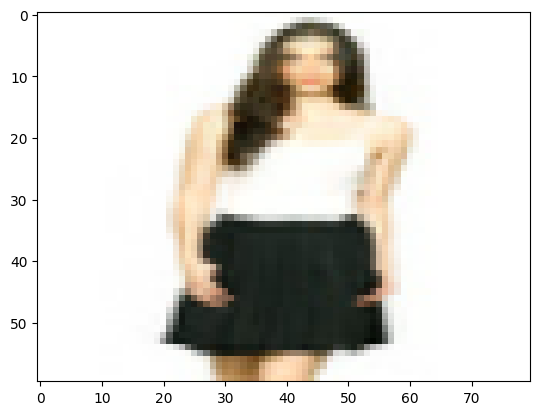

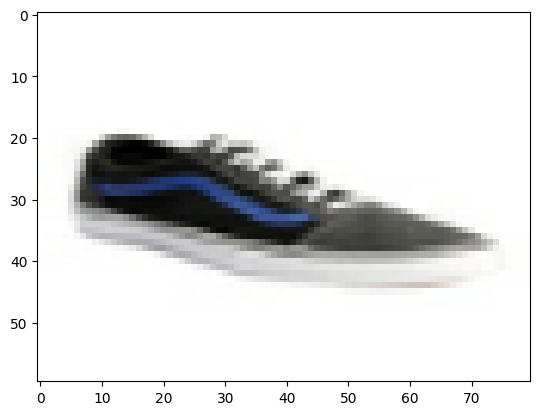

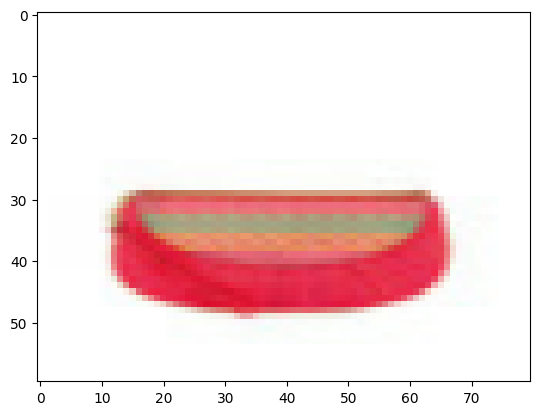

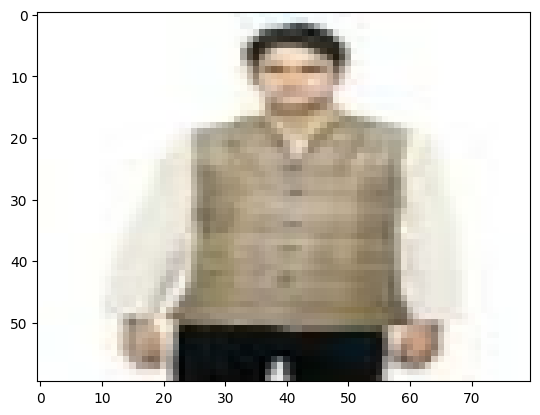

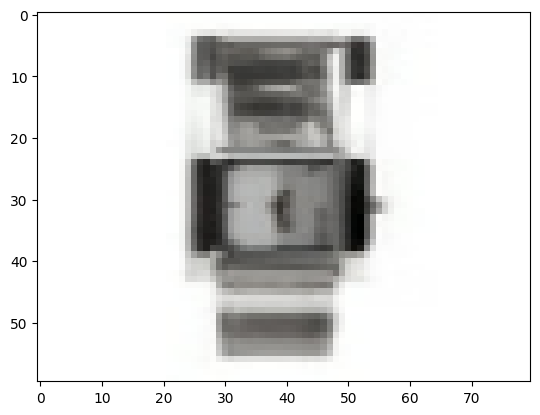

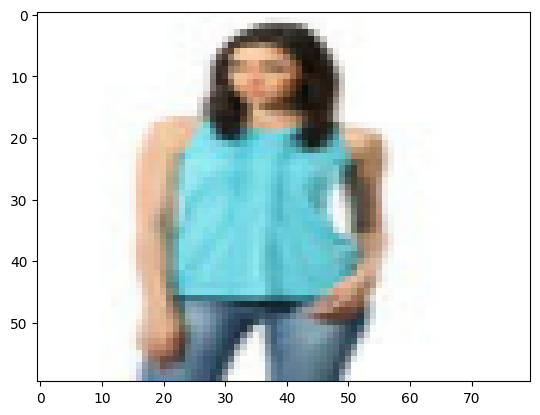

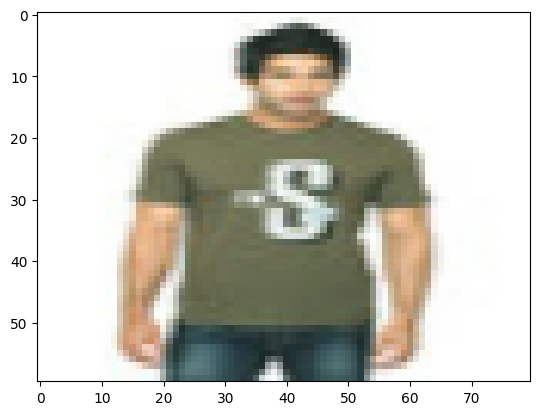

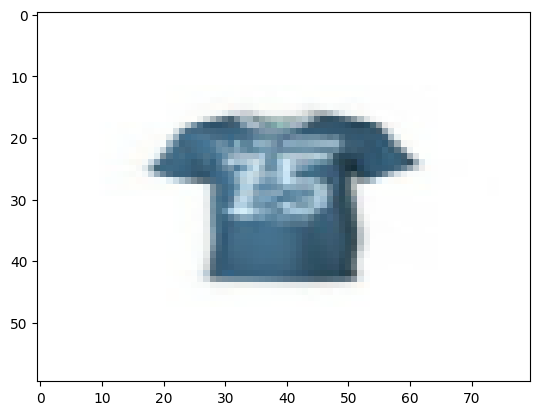

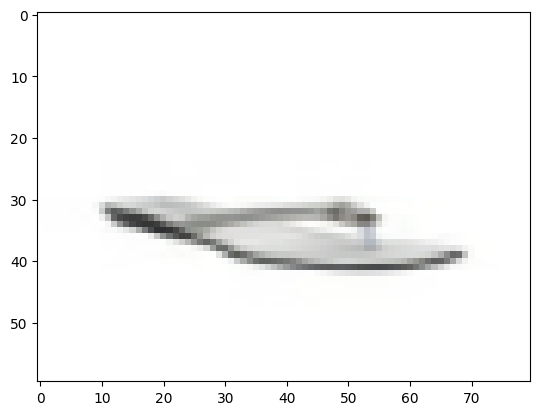

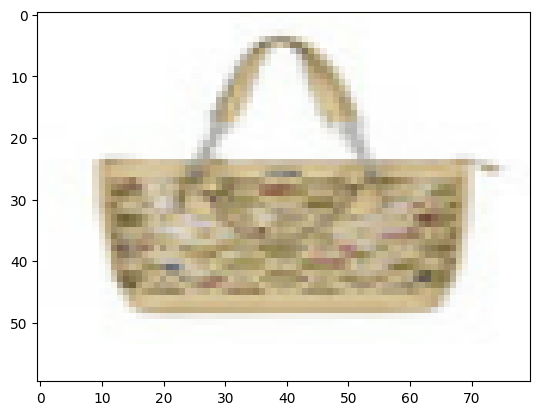

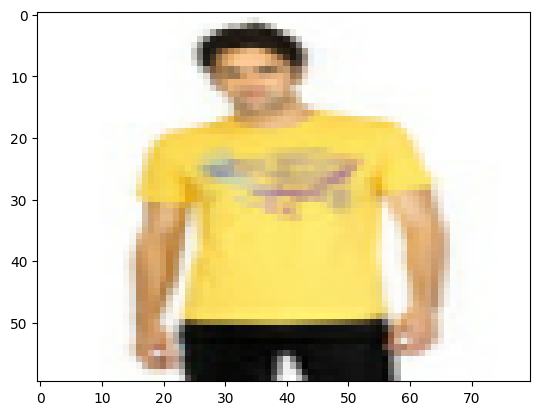

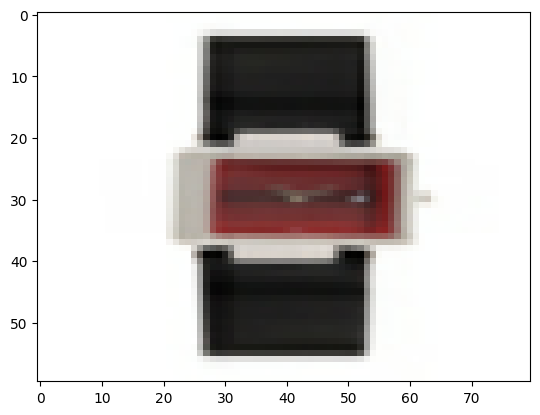

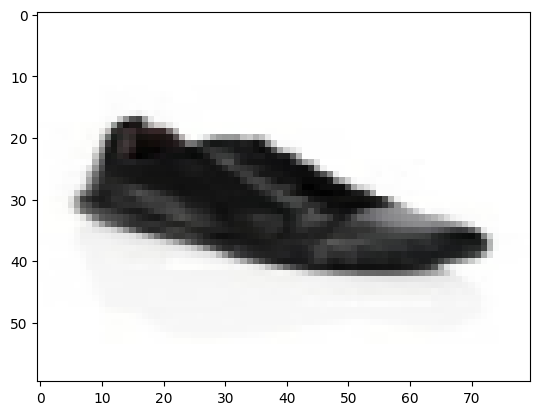

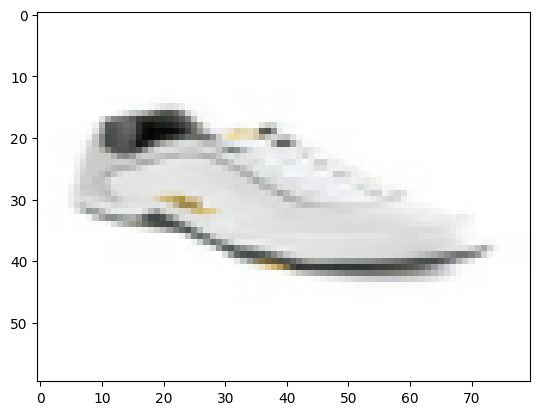

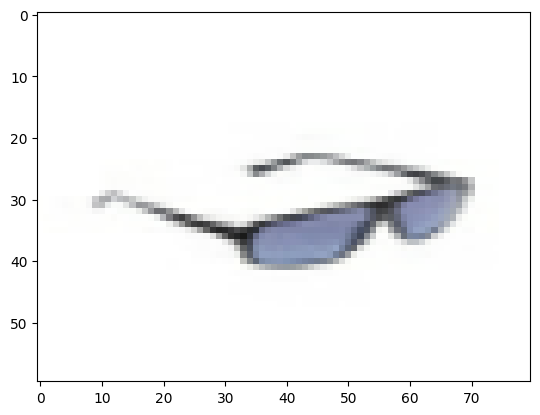

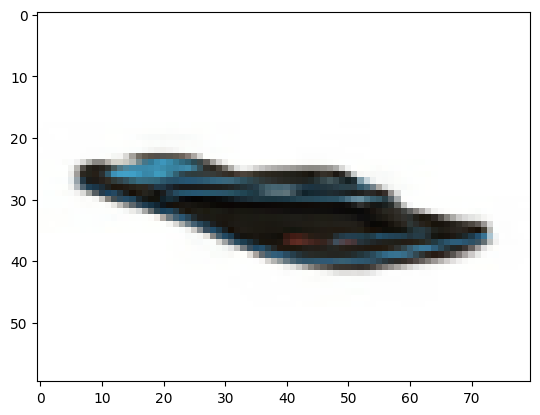

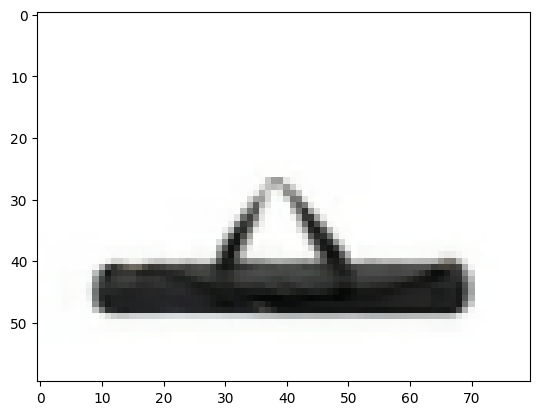

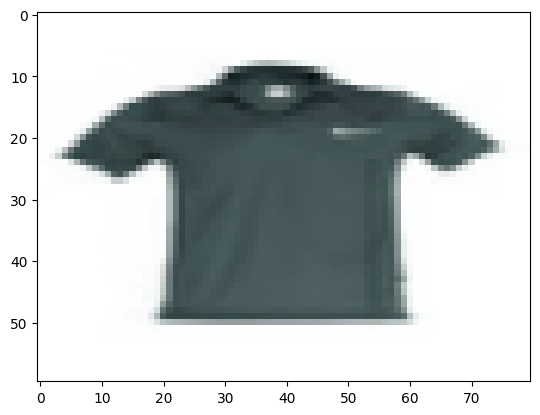

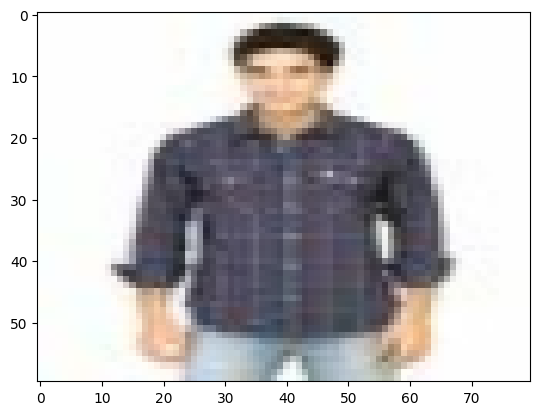

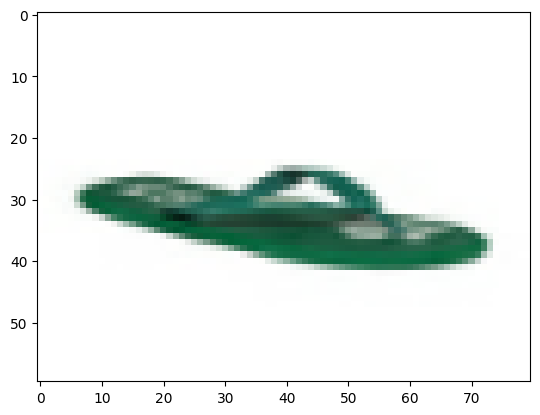

In [19]:
for images_batch in dataset.take(20):
    plt.imshow(images_batch[0])
    plt.show()